In [1]:
!pip install yfinance pandas numpy matplotlib scikit-learn keras tensorflow



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Ticker                          MSTR       MSTR       MSTR       MSTR   
Date                                                                    
2020-11-02 00:00:00+00:00  16.657000  16.657000  16.923000  16.250000   
2020-11-03 00:00:00+00:00  17.195000  17.195000  17.261000  16.778000   
2020-11-04 00:00:00+00:00  17.253000  17.253000  17.836000  17.143999   
2020-11-05 00:00:00+00:00  18.167999  18.167999  18.360001  17.785000   
2020-11-06 00:00:00+00:00  18.562000  18.562000  18.618000  17.750000   

Price                           Open   Volume  
Ticker                          MSTR     MSTR  
Date                                           
2020-11-02 00:00:00+00:00  16.891001  1257000  
2020-11-03 00:00:00+00:00  16.976000   908000  
2020-11-04 00:00:00+00:00  17.295000  1104000  
2020-11-05 00:00:00+00:00  17.850000  1732000  
2020-11-06 00:00:00+00:00  18.379000  1585000  


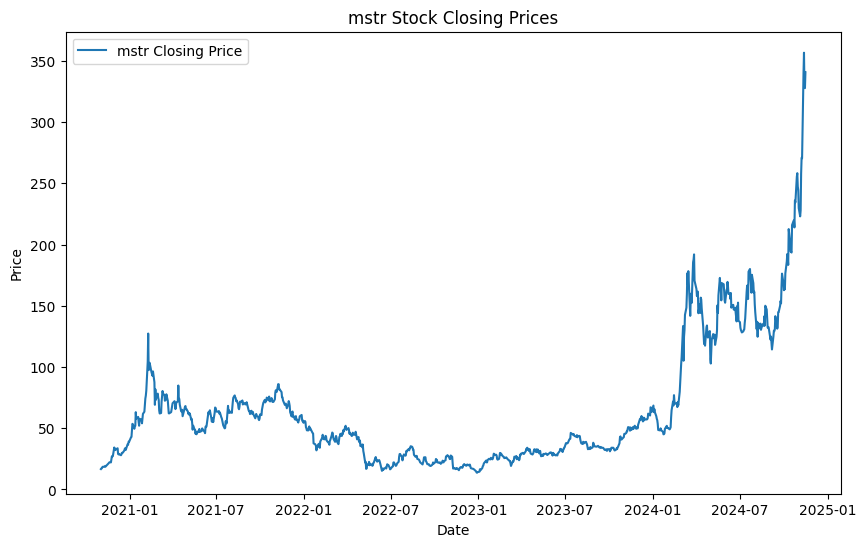

In [10]:
# Fetch stock data
stock_ticker = "mstr"
data = yf.download(stock_ticker, start="2020-11-01", end="2024-11-18")

# Display the first few rows
print(data.head())

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label=f"{stock_ticker} Closing Price")
plt.title(f"{stock_ticker} Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [12]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close_scaled'] = scaler.fit_transform(data[['Close']])

# Create sequences for LSTM
sequence_length = 60
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Prepare data for training
close_prices = data['Close_scaled'].values
X, y = create_sequences(close_prices, sequence_length)

# Split into train and test sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0037 - val_loss: 0.0077
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.9635e-04 - val_loss: 0.0072
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 3.8123e-04 - val_loss: 0.0059
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.5219e-04 - val_loss: 0.0078
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.7981e-04 - val_loss: 0.0051
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.9894e-04 - val_loss: 0.0055
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7717e-04 - val_loss: 0.0045
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 3.0788e-04 - val_loss: 0.0054
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 2.4154e-04 - val_loss: 0.0051
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.1850e-04 - val_loss: 0.0039


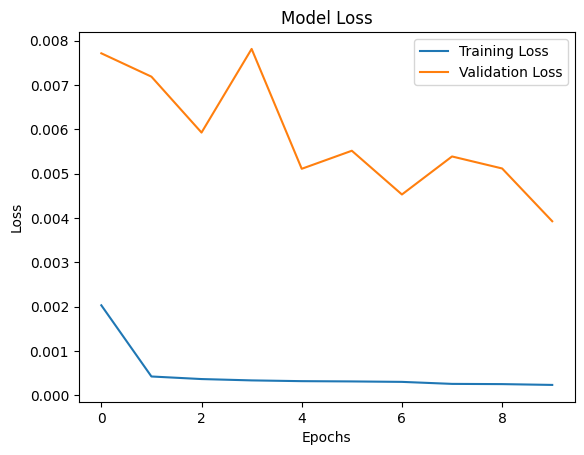

In [14]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0028
Test Loss: 0.003924770746380091
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


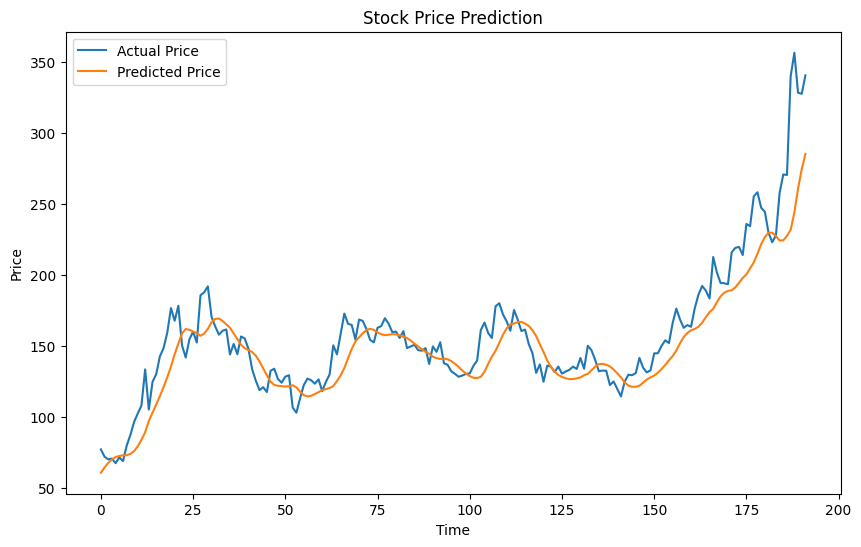

In [15]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Unscale the predictions

# Unscale the actual values
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [20]:
model.save("stock_price_predictor.h5")



In [21]:
from keras.models import load_model
model = load_model("stock_price_predictor.h5")



[*********************100%***********************]  1 of 1 completed

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


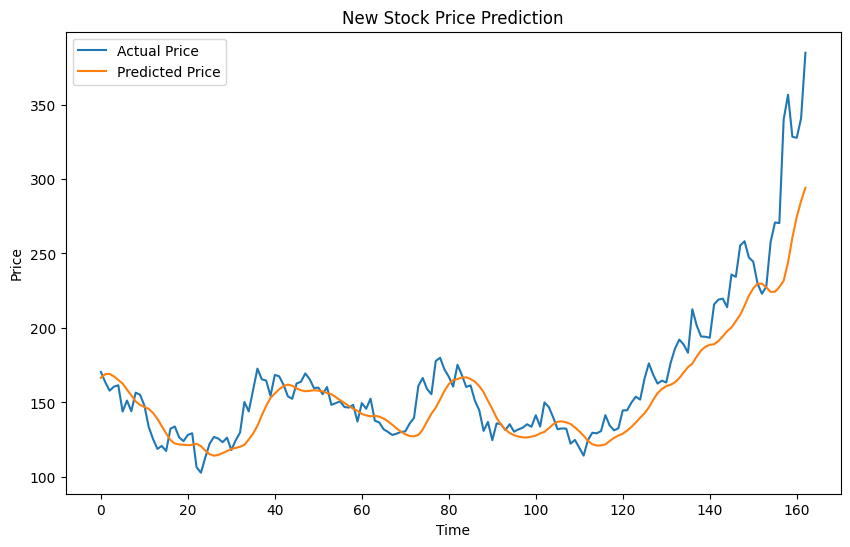

In [24]:
# Fetch new stock data
new_data = yf.download(stock_ticker, start="2024-01-01", end="2024-11-19")
new_close_prices = new_data['Close'].values
scaled_new_close = scaler.transform(new_close_prices.reshape(-1, 1))

# Create sequences for prediction
X_new, _ = create_sequences(scaled_new_close, sequence_length)
predictions_new = model.predict(X_new)
predictions_new_unscaled = scaler.inverse_transform(predictions_new)

# Plot new predictions
plt.figure(figsize=(10, 6))
plt.plot(new_close_prices[-len(predictions_new_unscaled):], label="Actual Price")
plt.plot(predictions_new_unscaled, label="Predicted Price")
plt.title("New Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
